# Aprendizaje Automatico (CEIoT): Trabajo Practico N°2
## Alumno: Gonzalo Carvallo (i0810)

Vamos a trabajar con el dataset de vinos proveniente de [Kaggle](https://www.kaggle.com/datasets/rakeshrau/social-network-ads). El dataset contiene proviene con datos de campaña de publicidad en una red social. Se cuenta con variables de los usuarios que tuvieron sujetos a la campaña. Se busca poder predecir dado un usuario con datos socioseconomicos si va a comprar o no el producto. 



### Ejercicios:
Sos un Data Scientist que trabaja para una empresa de publicidad que lanzo una campaña de publicidad en una red social. Se registró cada usuario al que se le mostró la publicidad, y se pudo obtener datos de la persona tales como `genero`, `edad` y `salario estimado`. Además se registró si el usuario luego compró el producto que la publicidad hacia referencia. Los datos están en `Social_Network_Ads.csv`. Se busca poder predecir dado un usuario con datos socioseconomicos si va a comprar o no el producto.



### Ejercicio 1: Lea el dataset como un DataFrame de Pandas. Realice un estudio de variables. Como se llaman y que están midiendo exactamente. Además, analice que tipo de variables son, cuál es el rango de estas variables y cómo se distribuyen (histograma). 

Se importan todas las librerias que usaremos y se realiza lectura del dataset como un DataFrame de Pandas.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Leemos el dataset
social_df = pd.read_csv("datasets/Social_Network_Ads.csv")

Observamos las primeras diez filas del dataset.

In [29]:
social_df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
5,15728773,Male,27.0,58000.0,0
6,15598044,Female,27.0,84000.0,0
7,15694829,Female,32.0,150000.0,1
8,15600575,Male,25.0,33000.0,0
9,15727311,Female,35.0,65000.0,0


Los atributos del dataset son:
- `User ID`: Cada persona tiene una identificación única a partir de la cual podemos identificarla de forma única.
- `Gender`: Es el genero de la persona. El producto puede ser interesante dependiendo del genero.
- `Age`: Edad de la persona. Porque el producto puede ser útil solo para algunas edades.
- `EstimatedSalary`: Esta columna contiene el salario de una persona, ya que el salario puede afectar las compras de una persona.

Y la columna a predecir es:
- `Purchased`: Contiene dos números "0" o "1". '0' significa no comprado y '1' significa comprado. 

In [23]:
# Veamos una descripción de todas las columnas
social_df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


Las edades van de 18 a 60 años, y los salarios de los 15k a los 150k.



In [5]:
# Veamos una descripción de todas las columnas, que tipo de columna es y si hay datos faltantes
social_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


Tenemos 2 columnas de tipo entero, 2 columnas de tipo flotante y 1 es una columna de strings.



In [7]:
# Verificar si hay datos nulos
print(social_df.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


No hay datos nulos.

La columna `User ID` es una columna que identifica a los usuarios, en el contexto del objetivo que estamos buscando, no nos sirve, por lo que vamos a eliminarla:

In [8]:
social_df.drop(columns="User ID", inplace=True)

Veamos los histogramas de los atributos numericos

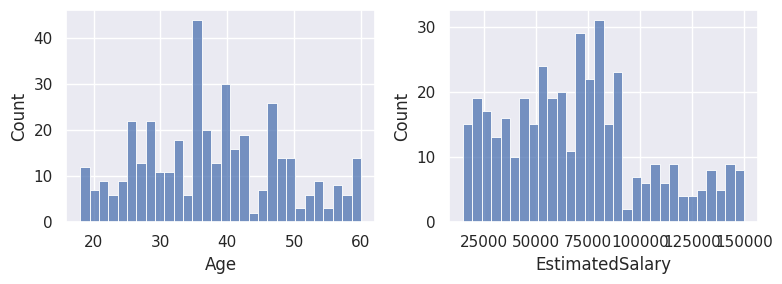

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
sns.histplot(data=social_df, x="Age", ax=ax[0], bins=30)
sns.histplot(data=social_df, x="EstimatedSalary", ax=ax[1], bins=30)
plt.tight_layout()
plt.show()


De los histogramas de los atributos, vemos que en edad tenemos una distribución uniforme hasta llegar a aproximadamente los 35 años, ahi estan la mayoria de los usuarios entre 35 y 45, luego tenemos en una distribución uniforme de edades hasta llegar a los 60 pero en menor cantidad de usuarios.

Por otro lado, el salario, tenemos una distribución uniforme entre 25000 y 100000 y luego otra en mucho menor tamaño entre 100000 y 150000. Es decir, la mayoria de los usarios ganan entre 25000 y 100000.

Veamos la distribución del género:

In [20]:
social_df["Gender"].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

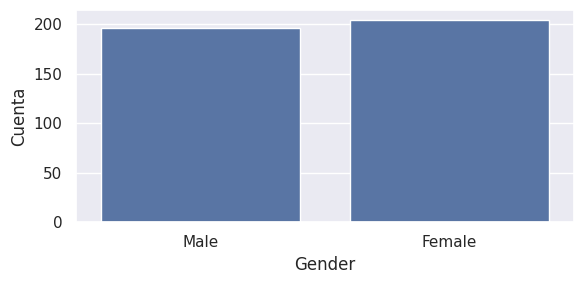

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
sns.countplot(data=social_df, x="Gender", ax=ax)
ax.set_ylabel("Cuenta")
plt.tight_layout()
plt.show()


Vemos que en este dataset tenemos dos generos y estos presentan una distribución bastante pareja.


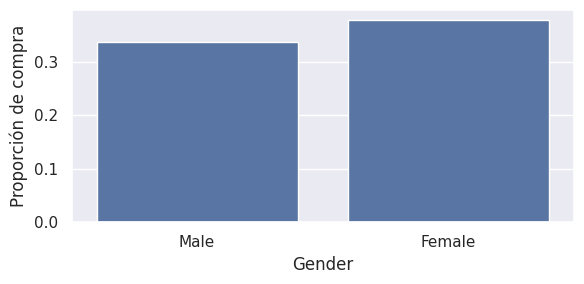

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
sns.barplot(data=social_df, y="Purchased", x="Gender", errorbar=None)
ax.set_ylabel("Proporción de compra")
plt.tight_layout()
plt.show()


Vemos que hay mas mujeres que compran que hombres para esta campaña, aunque la diferencia es muy poca.


### Ejercicio 2: Genere gráficos de cajas de los diferentes atributos separando por clase (compro o no el producto). Entre los atributos, se observa alguna diferencia en lo gráficos de cajas?

Vemos el grafico de caja de las demas variables

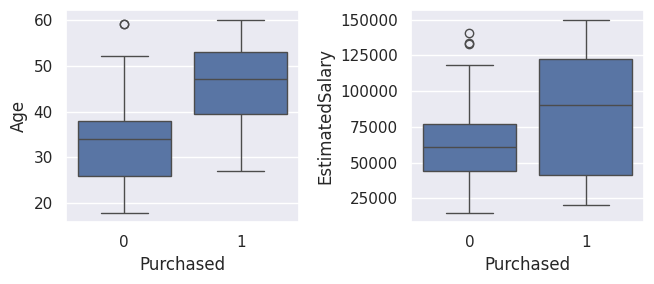

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(6.7, 3))
sns.boxplot(data=social_df, x="Purchased", y="Age", ax=ax[0])
sns.boxplot(data=social_df, x="Purchased", y="EstimatedSalary", ax=ax[1])
plt.tight_layout()
plt.show()


Vemos que la edad es un atributo que marca muy fuerte quien compra o no el producto. Por otro lado, el salario estimado vemos que los que no compran tienen un salario menor y con menos variación.

### Ejercicio 3: Analize las clases, estan balanceadas, o no? Qué clase nos parece mas importante de las dos?

In [31]:
social_df["Purchased"].value_counts(normalize=True)


Purchased
0    0.6425
1    0.3575
Name: proportion, dtype: float64

Un 65% aproximadamente no compro y 35% si compro. Lo cual es una buena distribución, no tenemos un gran desbalance de clases. 

### Ejercicio 4: Separe el dataset en entrenamiento y validación. Utilice 70%-30%.

Previo a esto vamos a transformar a la variable genero en numerica usando codificación dummy

In [32]:
social_df = pd.get_dummies(social_df, columns=["Gender"], drop_first=True)
# Reacomodamos la columna para dejar al final el target
# Esto no es obligatorio pero deja más prolijo a nuestro dataset.
social_df = social_df[['Age', 'EstimatedSalary', 'Gender_Male', 'Purchased']]



In [33]:
# Obtenemos a X e y. Recordar que X debe ser un array de dos dimensiones
X = social_df.drop(columns="Purchased").values
y = social_df["Purchased"].values

print(f"La forma de X es {X.shape}")
print(f"La forma de y es {y.shape}")


La forma de X es (400, 3)
La forma de y es (400,)


In [34]:
## Separamos el dataset en training y test
from sklearn.model_selection import train_test_split

# Usamos el argumento opcional para que se mantenga la proporcion en los conjuntos de entrenamiento y testeo. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Vamos a escalar a todas las entradas para no tener problemas de escala en el modelo
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train_scaled = sc_X.fit_transform(X_train) # usamos fit para crear el escalado y aplicar conjunto de entrenamiento
X_test_scaled = sc_X.transform(X_test) # solo hacemos el transform ya que fue escalado anteriormente


### Ejercicio 5: Determine que métrica se va a usar para evaluar la calidad de los modelos. Tenga en cuenta el balanceo de clases, y que objetivo se busca tener (por ejemplo, queremos predecir las mayor cantidad de personas que compran a expensas de tener falsos positivos o tener mucha seguridad a la hora de decir que una persona compra a expensa de tener falsos negativos).

Queremos identificar con mayor precisión a aquellos usuarios que realizan compras en comparación con los que no. Aunque no subestimamos la importancia de los usuarios que no realizan compras, nuestra prioridad radica en comprender y caracterizar a los usuarios que sí adquieren el producto. Esto nos permitirá establecer perfiles socioeconómicos más sólidos para este grupo de interés.

Con este enfoque en mente, buscamos que el modelo sea altamente preciso al predecir las compras, ya que esto facilitará la construcción de perfiles socioeconómicos más confiables. Para evaluar la efectividad de nuestro modelo, planeamos utilizar la matriz de confusión, que proporciona una visión detallada de los resultados de la clasificación, y el puntaje F0.5, una métrica que da más peso a la precisión que a la recuperación.

La matriz de confusión organiza la evaluación del rendimiento en modelos de clasificación, destacando verdaderos y falsos positivos y negativos. Por otro lado, el puntaje F0.5 equilibra precisión y recuperación, otorgando mayor importancia a la precisión. Esta métrica es útil al buscar minimizar los falsos positivos, sin descartar por completo la recuperación.

### Ejercicio 6: Construya un modelo de regresión logística, el cual se intente predecir si una persona compró el producto o no.

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, fbeta_score

logistic = LogisticRegression(random_state=0)

# 1. Entrene el modelo con el set de entrenamiento.
logistic.fit(X_train_scaled, y_train)

# 2. Evalúe el modelo con la métrica de evaluación.
y_pred = logistic.predict(X_test_scaled)

f0_5_logistic = fbeta_score(y_test, y_pred, zero_division=0, beta=0.5)

print(f"F0.5-score: {f0_5_logistic}")



F0.5-score: 0.7923497267759563


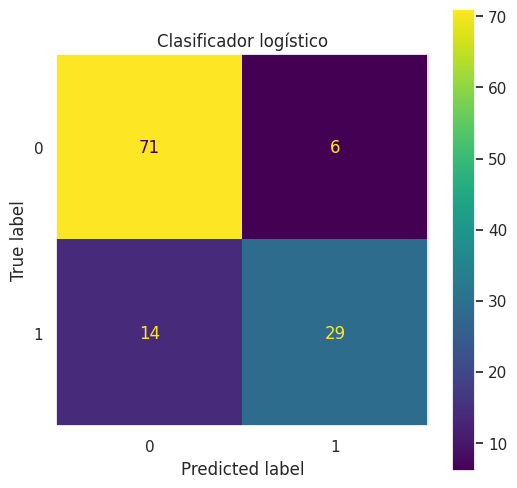

In [37]:
cm_logistic = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic,
                              display_labels=logistic.classes_)

fig, ax = plt.subplots(figsize=(6, 6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador logístico")
plt.show()


Curva ROC para evaluar el modelo para ver la calidad del modelo, que no depende del valor umbral. 

Nota: Elija un valor umbral que considere más optimo usando AUC y vuelva a clasificar usando ese valor.


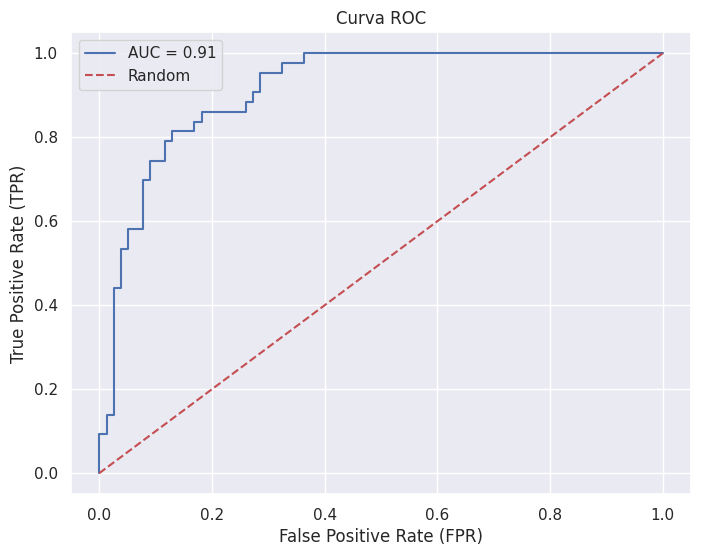

Umbral óptimo: 0.3816437212186997


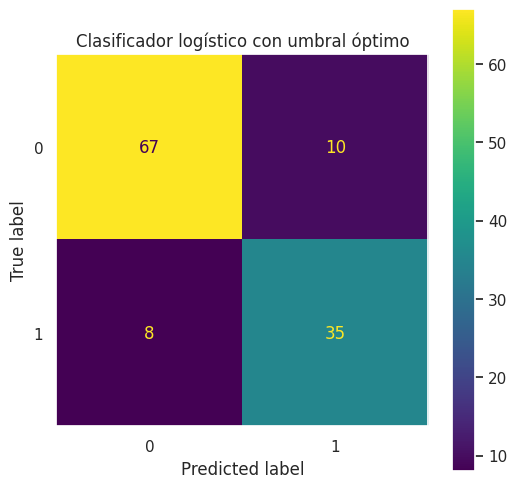

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilidades de predicción en lugar de las clases
y_prob = logistic.predict_proba(X_test_scaled)[:, 1]

# Calculo de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Area bajo la curva ROC (AUC)
auc = roc_auc_score(y_test, y_prob)

# Umbral óptimo que maximiza la suma de sensibilidad y especificidad
optimal_threshold = thresholds[np.argmax(tpr - fpr)]

# Usando el umbral óptimo
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Umbral óptimo
print(f'Umbral óptimo: {optimal_threshold}')

# Nueva matriz de confusión con el umbral óptimo
cm_optimal_threshold = confusion_matrix(y_test, y_pred_optimal)
disp_optimal_threshold = ConfusionMatrixDisplay(confusion_matrix=cm_optimal_threshold, display_labels=logistic.classes_)

fig, ax = plt.subplots(figsize=(6, 6))
ax.grid(False)
disp_optimal_threshold.plot(ax=ax)
ax.set_title("Clasificador logístico con umbral óptimo")
plt.show()


###  Ejercicio 7: Construya un modelo de KNN, el cual se intente predecir si una persona compró el producto o no.

In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Elegimos la distancia euclideana
classifier_knn_1 = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
classifier_knn_3 = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
classifier_knn_5 = KNeighborsClassifier(n_neighbors=5)
classifier_knn_13 = KNeighborsClassifier(n_neighbors=13)

# 2. Entrene los modelos con el set de entrenamiento.
classifier_knn_1.fit(X_train_scaled, y_train)
classifier_knn_3.fit(X_train_scaled, y_train)
classifier_knn_5.fit(X_train_scaled, y_train)
classifier_knn_13.fit(X_train_scaled, y_train)

# 3. Evalúe los modelos con la métrica de evaluación.
y_pred_knn_1 = classifier_knn_1.predict(X_test_scaled)
y_pred_knn_3 = classifier_knn_3.predict(X_test_scaled)
y_pred_knn_5 = classifier_knn_5.predict(X_test_scaled)
y_pred_knn_13 = classifier_knn_13.predict(X_test_scaled)

f0_5_knn_1 = fbeta_score(y_test, y_pred_knn_1, zero_division=0, beta=0.5)
f0_5_knn_3 = fbeta_score(y_test, y_pred_knn_3, zero_division=0, beta=0.5)
f0_5_knn_5 = fbeta_score(y_test, y_pred_knn_5, zero_division=0, beta=0.5)
f0_5_knn_13 = fbeta_score(y_test, y_pred_knn_13, zero_division=0, beta=0.5)

print(f"F0.5-score de KNN con 1 vecino: {f0_5_knn_1}")
print(f"F0.5-score de KNN con 3 vecinos: {f0_5_knn_3}")
print(f"F0.5-score de KNN con 5 vecinos: {f0_5_knn_5}")
print(f"F0.5-score de KNN con 13 vecinos: {f0_5_knn_13}")



F0.5-score de KNN con 1 vecino: 0.8454106280193237
F0.5-score de KNN con 3 vecinos: 0.8604651162790697
F0.5-score de KNN con 5 vecinos: 0.8744394618834082
F0.5-score de KNN con 13 vecinos: 0.8675799086757993


Vemos que el mejor modelo de los cuatro es el de **5 vecinos**. 

Obtengamos la matriz de confusión de este modelo:

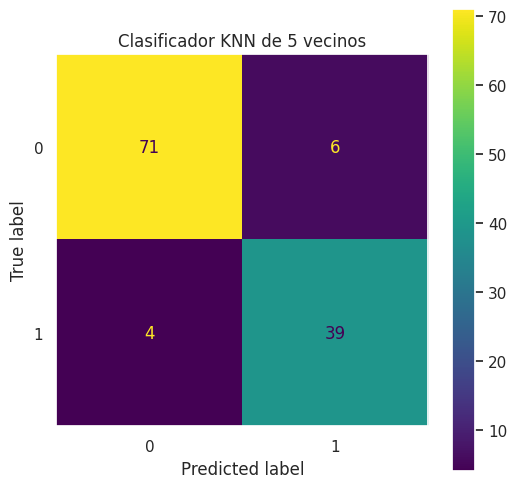

In [42]:
cm_knn = confusion_matrix(y_test, y_pred_knn_5)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                              display_labels=classifier_knn_5.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador KNN de 5 vecinos")
plt.show()


###  Ejercicio 8: Compare el mejor modelo de regresión logistica y el mejor modelo de KNN. Cual fue el mejor modelo? Discuta los resultados.

El modelo de regresión logística optimizado obtuvo un puntaje F0.5 de aproximadamente 0.79 en el conjunto de prueba. La matriz de confusión revela que el modelo clasificó correctamente a 67 instancias como verdaderos negativos (TN), 35 instancias como verdaderos positivos (TP), 10 instancias como falsos positivos (FP) y 8 instancias como falsos negativos (FN).

En comparación, el modelo KNN con 5 vecinos mostró un rendimiento superior con un puntaje F0.5 de aproximadamente 0.87. La matriz de confusión para este modelo indica que clasificó correctamente a 71 instancias como verdaderos negativos (TN), 39 instancias como verdaderos positivos (TP), 6 instancias como falsos positivos (FP) y solo 4 instancias como falsos negativos (FN).

Basándonos en el puntaje F0.5 y la matriz de confusión, el modelo KNN con 5 vecinos parece ofrecer un rendimiento más sólido en este conjunto de datos en comparación con la regresión logística. 

